In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movies Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/raw_credits.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/raw_titles.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movie by Year Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Show by Year Netflix.csv
/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Shows Netflix.csv


In [2]:
dados_filmes = pd.read_csv('/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movies Netflix.csv', index_col = [0])
dados_filmes

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
...,...,...,...,...,...,...,...
382,The Trip,2021,6.9,19706,113,comedy,NO
383,The Dirt,2019,6.9,47603,108,drama,US
384,Top Gun,1986,6.9,329656,110,drama,US


## Tradução de variáveis:

In [3]:
# Começando pelo dataset de filmes:

variaveis = {
    'TITLE' : 'Titulo',
    'RELEASE_YEAR' : 'Lancamento',
    'SCORE' : 'Nota',
    'NUMBER_OF_VOTES' : 'Numero_de_votos',
    'DURATION' : 'Duracao',
    'MAIN_GENRE' : 'Genero_principal',
    'MAIN_PRODUCTION' : 'Producao_principal'
}

In [4]:
dados_filmes.rename(columns = variaveis, inplace = True)
dados_filmes.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


In [5]:
# Traduzindo os gêneros:

dados_filmes['Genero_principal'].unique()

array(['documentary', 'scifi', 'drama', 'comedy', 'western', 'action',
       'crime', 'thriller', 'war', 'fantasy', 'romance', 'horror',
       'musical', 'animation', 'sports'], dtype=object)

In [6]:
genero_filme = {
    'documentary' : 'Documentário',
    'scifi' : 'Ficção científica',
    'drama' : 'Drama',
    'comedy' : 'Comédia',
    'western' : 'Faroeste',
    'action' : 'Ação',
    'crime' : 'Policial',
    'thriller' : 'Suspense',
    'war' : 'Guerra',
    'fantasy' : 'Fantasia',
    'romance' : 'Romace',
    'horror' : 'Terror',
    'musical' : 'Musical',
    'animation' : 'Animação',
    'sports' : 'Esportivo'
}

In [7]:
dados_filmes.Genero_principal = dados_filmes.Genero_principal.map(genero_filme)
dados_filmes.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,Documentário,GB
1,Inception,2010,8.8,2268288,148,Ficção científica,GB
2,Forrest Gump,1994,8.8,1994599,142,Drama,US
3,Anbe Sivam,2003,8.7,20595,160,Comédia,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,Comédia,US


In [8]:
# Importando o Seaborn

import seaborn as sns

## Análise 1: há relação entre as notas com duração do filme

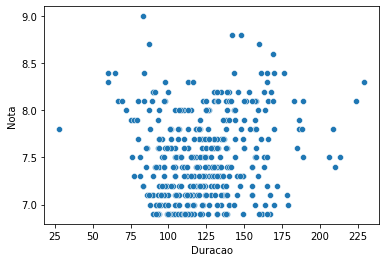

In [9]:
sns.scatterplot(x = 'Duracao', y = 'Nota', data = dados_filmes);

O gráfico não apresentou nenhuma tendência de comportamento, portanto, utilizei o lmplot() que plota um modelo de regressão sobre o gráfico.

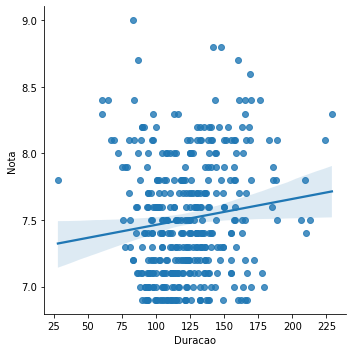

In [10]:
sns.lmplot(x = 'Duracao', y = 'Nota', data = dados_filmes);

Interpretação: A inclinação da reta indica que quanto maior for a duração do filme, as notas tendem a aumentar também.

## Análise 2: há relação entre as notas com o gênero do filme

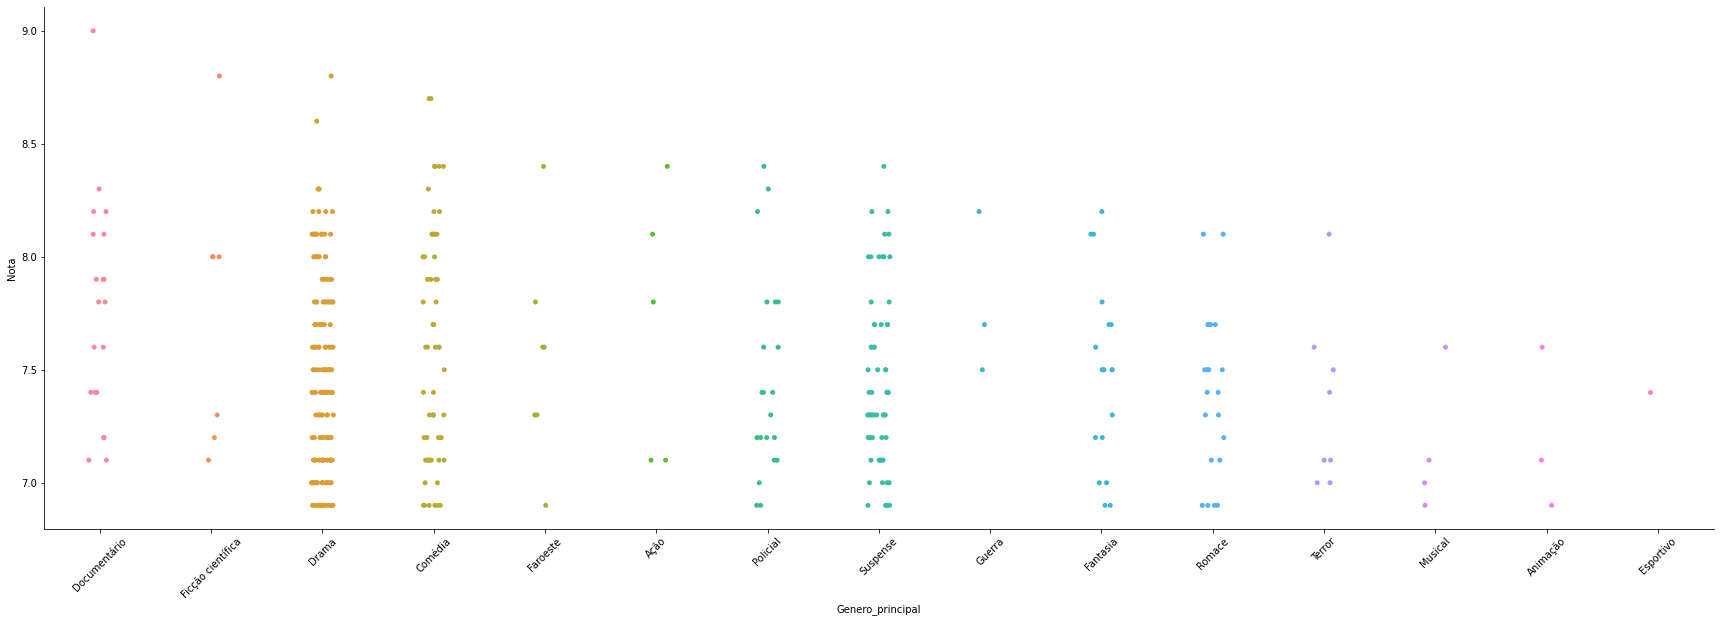

In [11]:
ax = sns.catplot(x = 'Genero_principal', y = 'Nota', data = dados_filmes, height = 8, aspect = 3)
ax.set_xticklabels(rotation = 45);

In [12]:
dados_filmes[dados_filmes.Genero_principal == 'Comédia'].describe()

,Lancamento,Nota,Numero_de_votos,Duracao
count,58.000000,58.000000,58.000000,58.000000
mean,2009.862069,7.606897,81099.862069,111.982759
std,11.436243,0.512600,110013.884639,30.089044
min,1975.000000,6.900000,10415.000000,60.000000
25%,2006.250000,7.125000,17614.250000,93.000000
50%,2014.000000,7.600000,25640.000000,104.000000
75%,2017.750000,8.000000,116342.000000,138.000000
max,2022.000000,8.700000,530877.000000,170.000000


In [13]:
dados_filmes[dados_filmes.Genero_principal == 'Suspense'].describe()

,Lancamento,Nota,Numero_de_votos,Duracao
count,59.000000,59.000000,59.000000,59.000000
mean,2012.508475,7.466102,142346.915254,123.000000
std,8.496192,0.383995,181282.504230,20.626398
min,1971.000000,6.900000,11241.000000,85.000000
25%,2009.000000,7.200000,22850.500000,107.000000
50%,2016.000000,7.400000,52657.000000,120.000000
75%,2018.000000,7.700000,200242.500000,134.500000
max,2021.000000,8.400000,748654.000000,178.000000


In [14]:
"""
Por ter muitos gêneros, a visualização do catplot não fica muito boa.
Portanto, criei um novo dataset contendo apenas dois gêneros:
Comédia e Suspense
Pois, segundo o .describe(), elas possuem amostras semelhantes.
Comédia com 58 e Suspense com 59.
"""
dados_filmes.loc[(dados_filmes['Genero_principal'] == 'Comédia')]

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
3,Anbe Sivam,2003,8.7,20595,160,Comédia,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,Comédia,US
8,Bo Burnham: Make Happy,2016,8.4,14356,60,Comédia,US
9,Louis C.K.: Hilarious,2010,8.4,11973,84,Comédia,US
10,Dave Chappelle: Sticks & Stones,2019,8.4,25687,65,Comédia,US
11,3 Idiots,2009,8.4,385782,170,Comédia,IN
18,Bo Burnham: What.,2013,8.3,11488,60,Comédia,US
26,PK,2014,8.2,178012,153,Comédia,IN
28,Monty Python and the Holy Grail,1975,8.2,530877,91,Comédia,GB


In [15]:
comedia = dados_filmes.loc[(dados_filmes['Genero_principal'] == 'Comédia')]
comedia.head()


,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
3,Anbe Sivam,2003,8.7,20595,160,Comédia,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,Comédia,US
8,Bo Burnham: Make Happy,2016,8.4,14356,60,Comédia,US
9,Louis C.K.: Hilarious,2010,8.4,11973,84,Comédia,US
10,Dave Chappelle: Sticks & Stones,2019,8.4,25687,65,Comédia,US


In [16]:
suspense = dados_filmes.loc[(dados_filmes['Genero_principal'] == 'Suspense')]
suspense.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
13,Super Deluxe,2019,8.4,13680,176,Suspense,IN
21,Drishyam,2015,8.2,79075,163,Suspense,IN
32,Andhadhun,2018,8.2,88359,139,Suspense,IN
48,Talvar,2015,8.1,34659,132,Suspense,IN
53,Mersal,2017,8.1,32573,169,Suspense,IN


In [17]:
# cs = Comédia e Suspense

cs = comedia.copy()
cs.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
3,Anbe Sivam,2003,8.7,20595,160,Comédia,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,Comédia,US
8,Bo Burnham: Make Happy,2016,8.4,14356,60,Comédia,US
9,Louis C.K.: Hilarious,2010,8.4,11973,84,Comédia,US
10,Dave Chappelle: Sticks & Stones,2019,8.4,25687,65,Comédia,US


In [18]:
cs = cs.append(suspense)
cs.sample(5)

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
299,Margin Call,2011,7.1,125883,107,Suspense,US
278,St. Vincent,2014,7.2,102103,102,Comédia,US
53,Mersal,2017,8.1,32573,169,Suspense,IN
218,Mirage,2018,7.4,52657,129,Suspense,ES
233,Pyaar Ka Punchnama 2,2015,7.3,14968,159,Comédia,IN


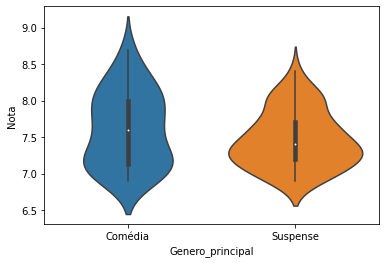

In [19]:
sns.violinplot(x = 'Genero_principal', y = 'Nota', data = cs);

Interpretação: Este gráfico mostra que os filmes de comédia tem mais filmes com nota 7 e 8, enquanto os filmes de suspense têm uma atribuição maior entre 7 e 7,5.

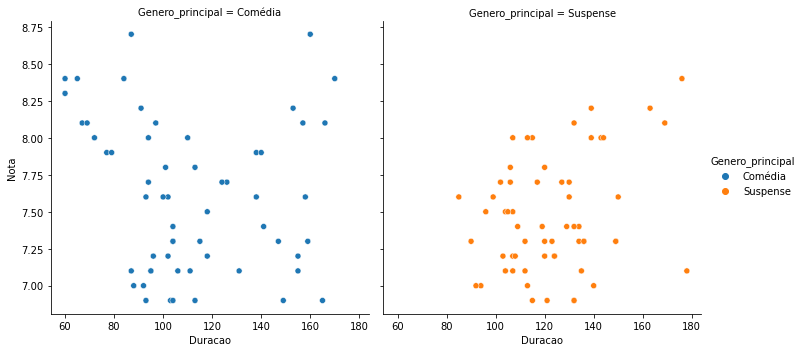

In [20]:
sns.relplot(x = 'Duracao', y = 'Nota', hue = 'Genero_principal', col = 'Genero_principal', data = cs);

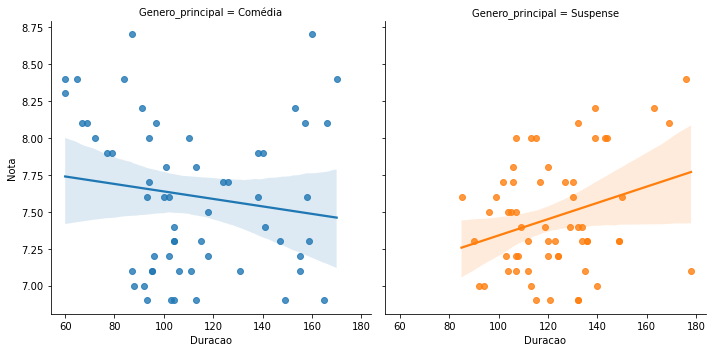

In [21]:
sns.lmplot(x = 'Duracao', y = 'Nota', hue = 'Genero_principal', col = 'Genero_principal', data = cs);

### Teste de hipótese:

H_0 = a distribuição da nota é a mesma nos dois grupos

H_alt = a distribuição da nota não é a mesma 

In [22]:
from scipy.stats import ranksums

In [23]:
filme_comedia = cs.query('Genero_principal == "Comédia"').Nota

In [24]:
filme_suspense = cs.query('Genero_principal == "Suspense"').Nota

In [25]:
ranksums(filme_comedia, filme_suspense)

RanksumsResult(statistic=1.2401979746216865, pvalue=0.214902177360492)

O valor-p foi superior a 0,5%, isso significa que apesar das notas não serem semelhantes nos dois grupos, matematicamente, a diferença entre os gêneros é insignificante. Neste caso, descarta-se a hipótese alternativa e aceitamos a hipótese nula.

In [26]:
ranksums_cs = ranksums(filme_comedia, filme_suspense)
print('O p-value é de {:.2f}'.format(ranksums_cs.pvalue))

O p-value é de 0.21


## Análise 3: a distribuição de nota é a mesma para produções de países diferentes?

In [27]:
dados_filmes.Producao_principal.value_counts()

US    157
IN    115
GB     29
DE      9
JP      9
FR      7
TR      7
ES      6
IT      4
KR      4
CA      4
AU      3
CN      3
HK      2
NL      2
BE      2
NO      2
NZ      2
IE      2
HU      2
UA      2
KH      1
DK      1
LT      1
XX      1
BR      1
MX      1
PL      1
PS      1
AR      1
TH      1
MW      1
ZA      1
CD      1
ID      1
Name: Producao_principal, dtype: int64

O top 5 de países produtores foi: os Estados Unidos com 157 filmes, Índia com 115, Grã-Bretanha com 29, Alemanha e Japão 9 filmes cada.

In [28]:
filmes_norte_americanos = dados_filmes.query('Producao_principal == "US"')
filmes_norte_americanos

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
2,Forrest Gump,1994,8.8,1994599,142,Drama,US
4,Bo Burnham: Inside,2021,8.7,44074,87,Comédia,US
5,Saving Private Ryan,1998,8.6,1346020,169,Drama,US
6,Django Unchained,2012,8.4,1472668,165,Faroeste,US
8,Bo Burnham: Make Happy,2016,8.4,14356,60,Comédia,US
...,...,...,...,...,...,...,...
379,Legend of the Guardians: The Owls of Ga'Hoole,2010,6.9,82623,100,Fantasia,US
380,Christine,2016,6.9,14977,115,Drama,US
383,The Dirt,2019,6.9,47603,108,Drama,US


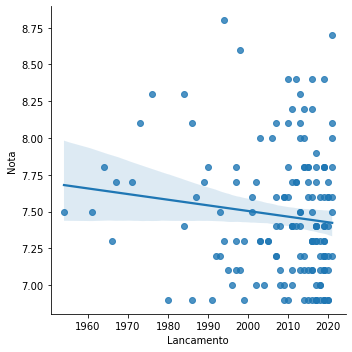

In [29]:
sns.lmplot(x = 'Lancamento', y = 'Nota', data = filmes_norte_americanos);

In [30]:
filmes_estrangeiros = dados_filmes.query('Producao_principal == "IN"')
filmes_estrangeiros

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
3,Anbe Sivam,2003,8.7,20595,160,Comédia,IN
7,Dangal,2016,8.4,180247,161,Ação,IN
11,3 Idiots,2009,8.4,385782,170,Comédia,IN
12,Black Friday,2004,8.4,20611,143,Policial,IN
13,Super Deluxe,2019,8.4,13680,176,Suspense,IN
...,...,...,...,...,...,...,...
364,Welcome,2007,6.9,21799,160,Romace,IN
370,AK vs AK,2020,6.9,14048,108,Drama,IN
373,2 States,2014,6.9,25344,149,Comédia,IN


In [31]:
# Para que as amostras fiquem mais próximas, também vou adicionar as produção da Grã-Bretanha (29) e Alemanha (9)
estrangeiro2 = dados_filmes.query('Producao_principal == "GB"')
estrangeiro2.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,Documentário,GB
1,Inception,2010,8.8,2268288,148,Ficção científica,GB
19,Full Metal Jacket,1987,8.3,723306,116,Drama,GB
28,Monty Python and the Holy Grail,1975,8.2,530877,91,Comédia,GB
33,Bill Burr: Paper Tiger,2019,8.1,10649,67,Comédia,GB


In [32]:
filmes_estrangeiros = filmes_estrangeiros.append(estrangeiro2)
filmes_estrangeiros.sample(5)

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
268,Wazir,2016,7.2,18681,103,Suspense,IN
201,Once Upon a Time in Mumbaai,2010,7.4,17494,132,Suspense,IN
93,Lakshya,2004,7.8,23076,186,Drama,IN
159,Ludo,2020,7.6,37528,150,Policial,IN
322,Don,2006,7.1,36836,178,Suspense,IN


In [33]:
estrangeiro3 = dados_filmes.query('Producao_principal == "DE"')
estrangeiro3.head()

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
64,The Bourne Ultimatum,2007,8.0,627009,115,Suspense,DE
108,System Crasher,2019,7.8,12699,118,Drama,DE
180,The Devil's Advocate,1997,7.5,361422,144,Terror,DE
184,Who Am I,2014,7.5,55044,105,Suspense,DE
215,Schumacher,2021,7.4,21558,112,Esportivo,DE


In [34]:
filmes_estrangeiros = filmes_estrangeiros.append(estrangeiro3)
filmes_estrangeiros.sample(5)

,Titulo,Lancamento,Nota,Numero_de_votos,Duracao,Genero_principal,Producao_principal
index,,,,,,,
216,Guzaarish,2010,7.4,18466,126,Drama,IN
373,2 States,2014,6.9,25344,149,Comédia,IN
66,Special 26,2013,8.0,55489,144,Suspense,IN
268,Wazir,2016,7.2,18681,103,Suspense,IN
301,Black Mirror: Bandersnatch,2018,7.1,123377,90,Ficção científica,GB


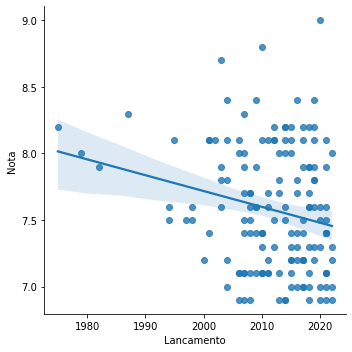

In [35]:
sns.lmplot(x = 'Lancamento', y = 'Nota', data = filmes_estrangeiros);

### Teste de hipótese 2:

H_0 = a distribuição da nota é a mesma nos dois dataframes

H_alt = a distribuição da nota não é a mesma 

In [36]:
norte_americanos = filmes_norte_americanos.Nota

In [37]:
estrangeiros = filmes_estrangeiros.Nota

In [38]:
ranksums(norte_americanos, estrangeiros)

RanksumsResult(statistic=-2.0202411081977893, pvalue=0.04335838415782474)

Com este Valor-p, menor do que 0.05, rejeita-se a Hipótese Nula.
Ou seja, a distribuição não é a mesma nos dois dataframes.